In [1]:
# Unit 8 Project 1
      
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime as dt
import os
import matplotlib.pyplot as plt

from pathlib import Path
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
print(f"Current Working Directory: {Path.cwd()}")

Current Working Directory: /Users/Agzy/Desktop/Project 1


In [3]:
# Reading returns CSV file into DataFrame
pre_covid = Path("Data/Pre_2.csv")               
pre_covid_df = pd.read_csv(pre_covid,index_col="DATE", parse_dates=True, infer_datetime_format=True)
pre_covid_df.head()

post_covid = Path("Data/Post_2.csv") 
post_covid_df = pd.read_csv(post_covid,index_col="DATE", parse_dates=True, infer_datetime_format=True)

post_covid_df.dtypes

DJI          float64
S&P500       float64
NASDAQ       float64
TSX          float64
TSX_60       float64
HSI          float64
SHA          float64
NIKKEI       float64
EURO         float64
FTSE_100     float64
FTSE_MIB     float64
AUS          float64
WTI_Crude    float64
GOLD         float64
dtype: object

In [4]:
# Count nulls in Pre Covid DataFrame
pre_covid_df.isna().sum()

DJI           0
S&P500        0
NASDAQ        0
TSX           5
TSX_60        5
HSI          11
SHA          20
NIKKEI       20
EURO          9
FTSE_100      4
FTSE_MIB      6
AUS           5
WTI_Crude     3
GOLD          3
dtype: int64

In [5]:
# Count nulls in Post Covid DataFrame
post_covid_df.isna().sum()

DJI           0
S&P500        0
NASDAQ        0
TSX           5
TSX_60        5
HSI          10
SHA          19
NIKKEI       18
EURO          9
FTSE_100      4
FTSE_MIB      6
AUS           4
WTI_Crude     3
GOLD          3
dtype: int64

In [6]:
# Drop nulls from Pre Covid Dataframe
pre_covid_df.dropna(inplace=True)
pre_covid_df.isnull().sum()

# Drop nulls from Post Covid Dataframe
pre_covid_df.dropna(inplace=True)
pre_covid_df.isnull().sum()

DJI          0
S&P500       0
NASDAQ       0
TSX          0
TSX_60       0
HSI          0
SHA          0
NIKKEI       0
EURO         0
FTSE_100     0
FTSE_MIB     0
AUS          0
WTI_Crude    0
GOLD         0
dtype: int64

In [7]:
pre_covid_df.count()
post_covid_df.head()

,DJI,S&P500,NASDAQ,TSX,TSX_60,HSI,SHA,NIKKEI,EURO,FTSE_100,FTSE_MIB,AUS,WTI_Crude,GOLD
DATE,,,,,,,,,,,,,,
2019-07-01,26717.42969,2964.33008,8091.16016,NaN,NaN,NaN,3044.90308,21729.97070,3497.59009,7497.5,21254.04,6648.10010,59.09,1385.59998
2019-07-02,26786.67969,2973.01001,8109.08984,16471.30078,985.45,28875.56055,3043.94312,21754.26953,3507.97998,7559.2,21392.87,6653.20020,56.25,1404.59998
2019-07-03,26966.00000,2995.82007,8170.22998,16576.19922,992.46,28855.14063,3015.26294,21638.16016,3540.62988,7609.3,21905.34,6685.50000,NaN,NaN
2019-07-05,26922.11914,2990.40991,8161.79004,16542.00000,989.73,28774.83008,3011.05908,21746.38086,3527.97998,7553.1,21985.79,6751.29981,57.51,1396.69995
2019-07-08,26806.14063,2975.94995,8098.37988,16463.00000,985.05,28331.68945,2933.36304,21534.34961,3523.76001,7549.3,21976.00,6672.20020,57.66,1397.00000


In [8]:
# Calculate Daily Returns for Pre Covid Data
daily_returns_pre_covid = pre_covid_df.pct_change()
daily_returns_pre_covid.head()

# Calculate Daily Returns for Post Covid Data
daily_returns_post_covid = post_covid_df.pct_change()
daily_returns_post_covid.head()

,DJI,S&P500,NASDAQ,TSX,TSX_60,HSI,SHA,NIKKEI,EURO,FTSE_100,FTSE_MIB,AUS,WTI_Crude,GOLD
DATE,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,0.002592,0.002928,0.002216,NaN,NaN,NaN,-0.000315,0.001118,0.002971,0.008229,0.006532,0.000767,-0.048062,0.013712
2019-07-03,0.006694,0.007672,0.007540,0.006369,0.007114,-0.000707,-0.009422,-0.005337,0.009307,0.006628,0.023955,0.004855,0.000000,0.000000
2019-07-05,-0.001627,-0.001806,-0.001033,-0.002063,-0.002751,-0.002783,-0.001394,0.005001,-0.003573,-0.007386,0.003673,0.009842,0.022400,-0.005624
2019-07-08,-0.004308,-0.004835,-0.007769,-0.004776,-0.004729,-0.015400,-0.025804,-0.009750,-0.001196,-0.000503,-0.000445,-0.011716,0.002608,0.000215


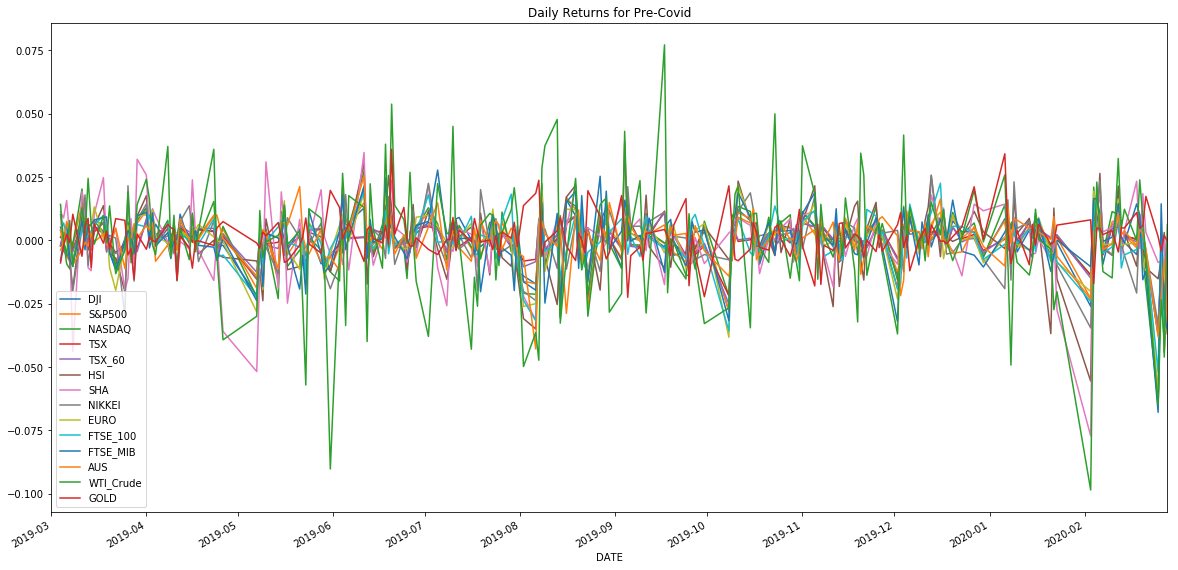

In [9]:
# Plotting the daily returns for Pre Covid daily returns
daily_returns_pre_covid.plot(title='Daily Returns for Pre-Covid', figsize=(20,10))

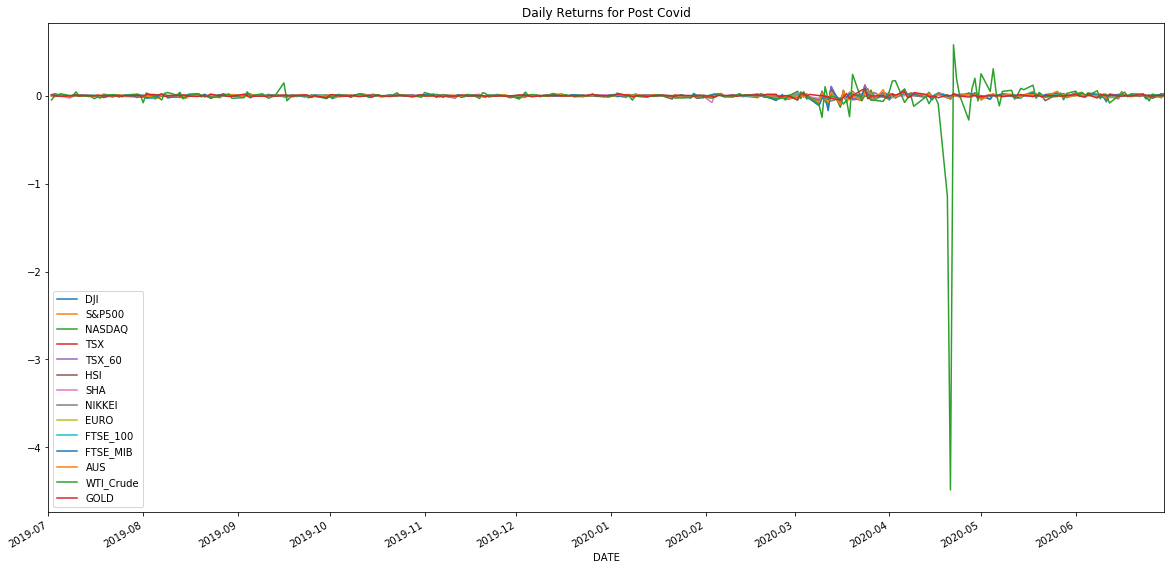

In [10]:
# Plotting the daily returns for Post Covid daily returns
daily_returns_post_covid.plot(title='Daily Returns for Post Covid', figsize=(20,10))

In [11]:
# Drop WTI Crude's Daily return data
daily_returns_post_covid_1 =daily_returns_post_covid.drop(columns = ['WTI_Crude','GOLD','DJI', 'NASDAQ','TSX_60', 'FTSE_MIB', 'HSI', 'AUS'])
daily_returns_pre_covid_1= daily_returns_pre_covid.drop(columns = ['WTI_Crude','GOLD','DJI', 'NASDAQ','TSX_60', 'FTSE_MIB','HSI','AUS'])

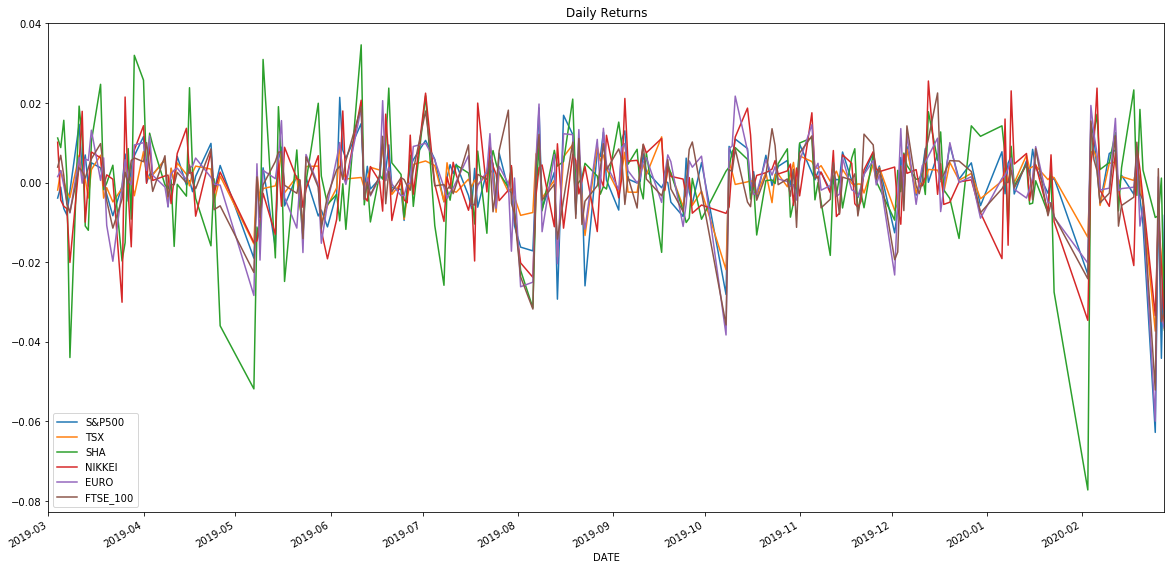

In [12]:

# Plotting the daily returns
daily_returns_pre_covid_1.plot(title='Daily Returns', figsize=(20,10))

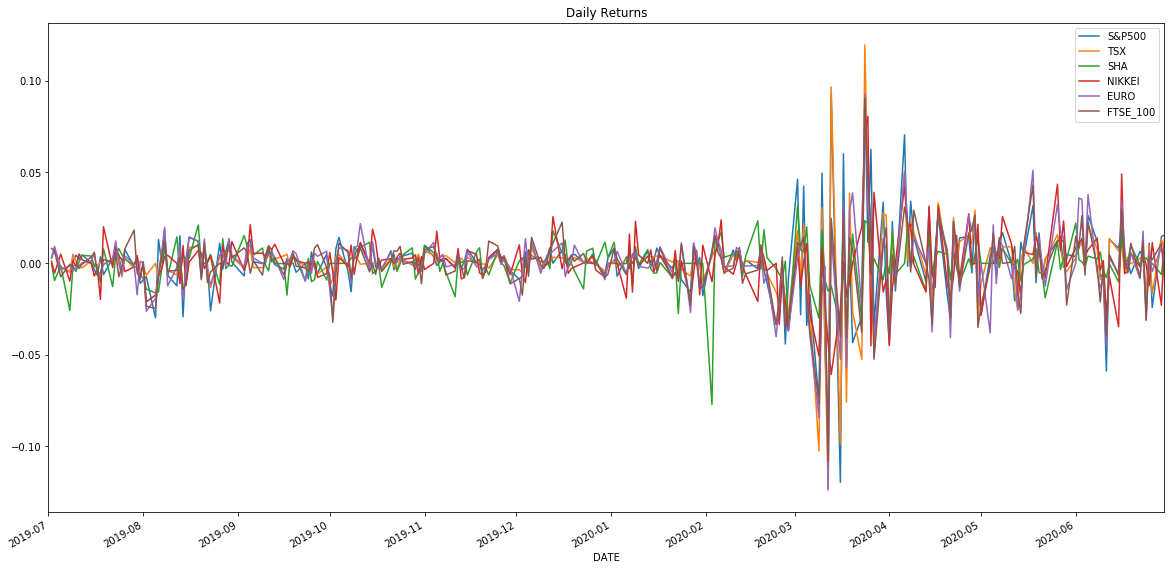

In [13]:
#Portfolio Analysis - calculate and visualize performance and risk metrics for Pre Covid

# Plotting the daily returns and cumulative returns.
daily_returns_post_covid_1.plot(title='Daily Returns', figsize=(20,10))


In [14]:
# Calculate cumulative returns for Pre Covid
cumulative_returns_pre_covid = (1 + daily_returns_pre_covid_1).cumprod()
cumulative_returns_pre_covid.head()

# Calculate cumulative returns for Post Covid
cumulative_returns_post_covid = (1 + daily_returns_post_covid_1).cumprod()
cumulative_returns_post_covid.head()

,S&P500,TSX,SHA,NIKKEI,EURO,FTSE_100
DATE,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,1.002928,NaN,0.999685,1.001118,1.002971,1.008229
2019-07-03,1.010623,1.006369,0.990266,0.995775,1.012306,1.014912
2019-07-05,1.008798,1.004292,0.988885,1.000755,1.008689,1.007416
2019-07-08,1.003920,0.999496,0.963368,0.990998,1.007482,1.006909


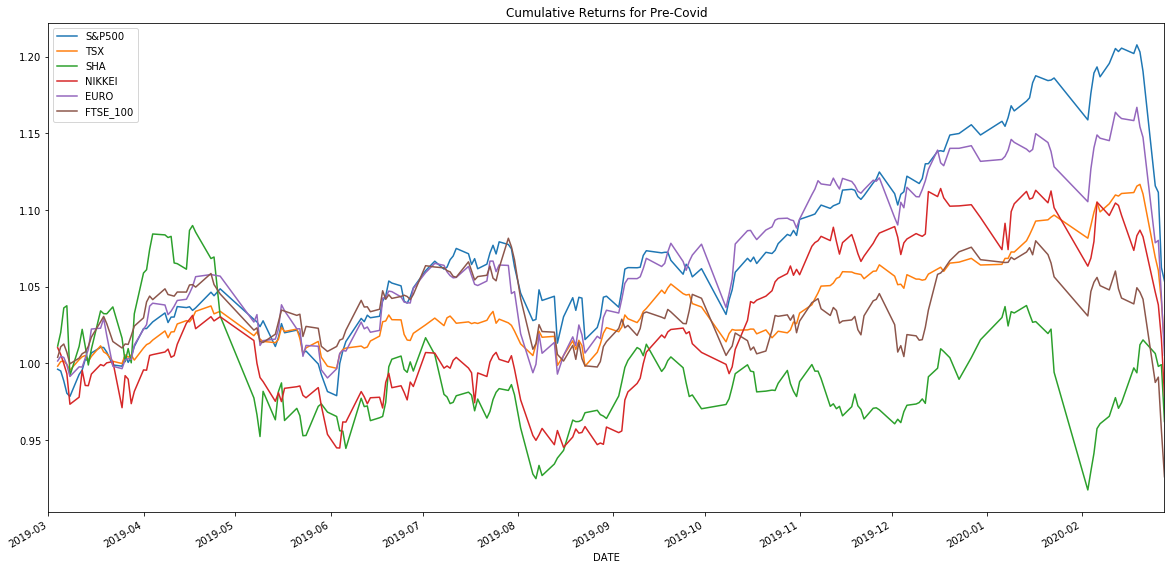

In [15]:
# Plotting cumulative returns for Pre Covid
cumulative_returns_pre_covid.plot(title='Cumulative Returns for Pre-Covid', figsize=(20,10))

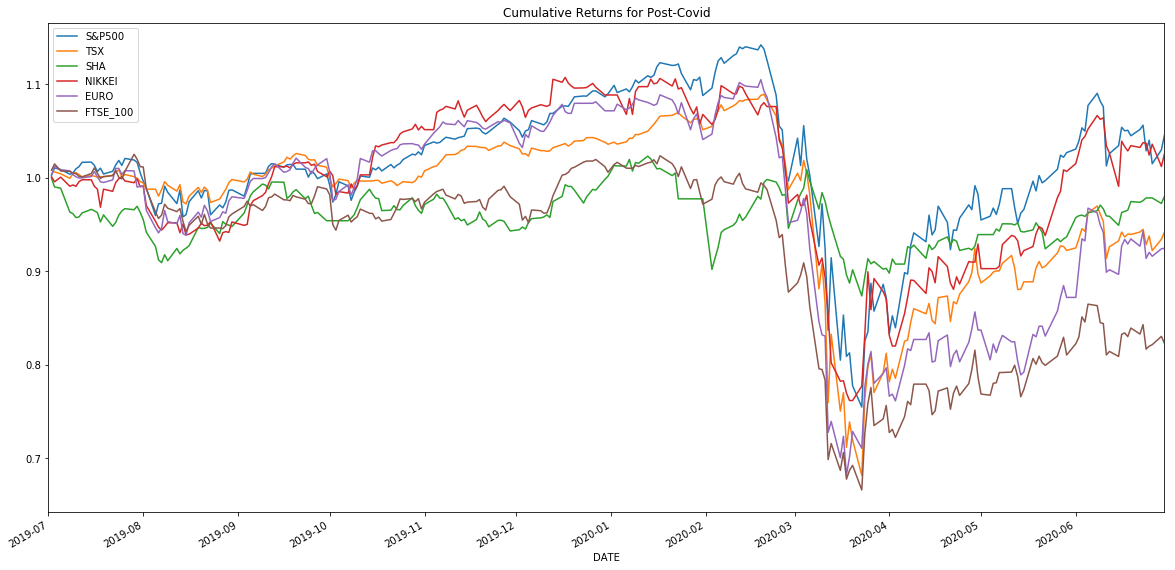

In [16]:
# Plotting cumulative returns for Post Covid
cumulative_returns_post_covid.plot(title='Cumulative Returns for Post-Covid', figsize=(20,10))

In [17]:
# Calculate the standard deviation for Pre & Post Covid

#Pre Covid STD
daily_returns_pre_covid_std = daily_returns_pre_covid_1.std().sort_values(ascending=False)
daily_returns_pre_covid_std

#Post Covid STD
daily_returns_post_covid_std = daily_returns_post_covid_1.std().sort_values(ascending=False)
daily_returns_post_covid_std


S&P500      0.021159
TSX         0.020333
EURO        0.019017
FTSE_100    0.017330
NIKKEI      0.015669
SHA         0.010773
dtype: float64

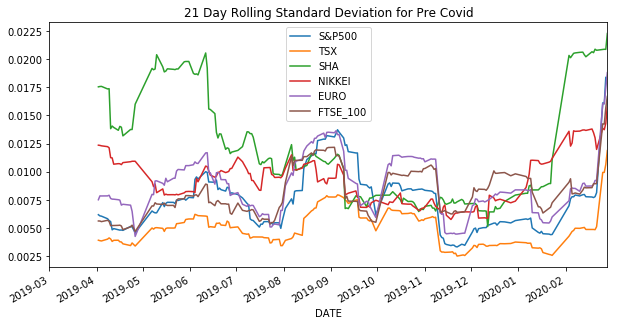

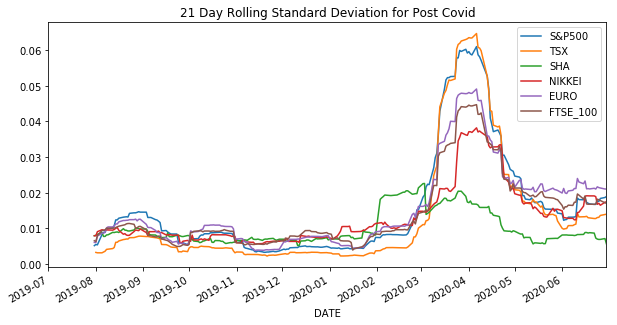

In [18]:
#Rolling Statistics - Risk changes over time. Analyze the rolling statistics for Risk and Beta.

#Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window

#sorting before the moving averages for Pre & Post Covid
daily_returns_pre_covid = daily_returns_pre_covid_1.sort_index()
daily_returns_post_covid = daily_returns_post_covid_1.sort_index()

#Calculating rolling std using 21 trading day window
rolling_std_pre_covid = daily_returns_pre_covid.rolling(window=21).std().plot(title = '21 Day Rolling Standard Deviation for Pre Covid', figsize =[10,5])
rolling_std_post_covid = daily_returns_post_covid.rolling(window=21).std().plot(title = '21 Day Rolling Standard Deviation for Post Covid', figsize =[10,5])
#plotting


In [19]:
#Construct a correlation table for Pre & Post Covid
correlation_table_pre_covid = daily_returns_pre_covid.corr()
correlation_table_post_covid = daily_returns_post_covid.corr()
correlation_table_pre_covid

,S&P500,TSX,SHA,NIKKEI,EURO,FTSE_100
S&P500,1.000000,0.836073,0.319212,0.411985,0.819397,0.725458
TSX,0.836073,1.000000,0.332982,0.463117,0.799956,0.722295
SHA,0.319212,0.332982,1.000000,0.496405,0.405466,0.419013
NIKKEI,0.411985,0.463117,0.496405,1.000000,0.450363,0.477313
EURO,0.819397,0.799956,0.405466,0.450363,1.000000,0.850885
FTSE_100,0.725458,0.722295,0.419013,0.477313,0.850885,1.000000


In [20]:
correlation_table_post_covid

,S&P500,TSX,SHA,NIKKEI,EURO,FTSE_100
S&P500,1.000000,0.882224,0.265681,0.316284,0.721407,0.732413
TSX,0.882224,1.000000,0.329921,0.374124,0.781571,0.809486
SHA,0.265681,0.329921,1.000000,0.471894,0.342147,0.350582
NIKKEI,0.316284,0.374124,0.471894,1.000000,0.488305,0.460920
EURO,0.721407,0.781571,0.342147,0.488305,1.000000,0.918792
FTSE_100,0.732413,0.809486,0.350582,0.460920,0.918792,1.000000


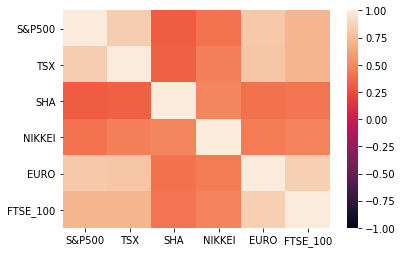

In [21]:
#correlation matrix using a heatmap for Pre-Covid & Post-Covid
sns.heatmap(correlation_table_pre_covid, vmin=-1, vmax=1)

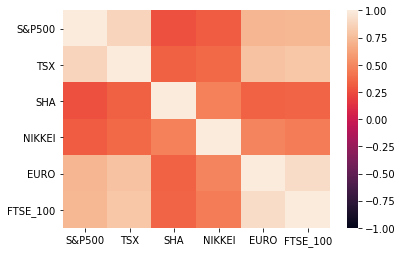

In [22]:
sns.heatmap(correlation_table_post_covid, vmin=-1, vmax=1)

In [23]:
#5. Calculate the Sharpe ratios by computing the quotient of `annualized average return` and `annualized standard deviation`.
sharpe_ratios_pre_covid = (daily_returns_pre_covid.mean() * 252) / (daily_returns_pre_covid.std()* np.sqrt(252))


sharpe_ratios_post_covid = (daily_returns_post_covid.mean() * 252) / (daily_returns_post_covid.std()* np.sqrt(252))
sharpe_ratios_pre_covid

daily_returns_pre_covid.tail(1)

,S&P500,TSX,SHA,NIKKEI,EURO,FTSE_100
DATE,,,,,,
2020-02-28,-0.008238,-0.027175,-0.037116,-0.036689,-0.036584,-0.031752


In [24]:
sharpe_ratios_post_covid

S&P500      0.302411
TSX        -0.022627
SHA        -0.030537
NIKKEI      0.225339
EURO       -0.106436
FTSE_100   -0.569317
dtype: float64

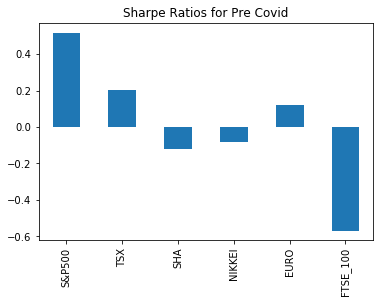

In [25]:
#6. Plot the Sharpe ratios using a bar chart.
sharpe_ratios_pre_covid.plot(kind="bar", title="Sharpe Ratios for Pre Covid")

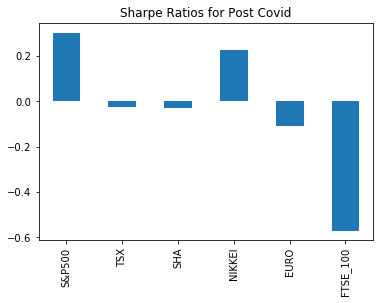

In [26]:
sharpe_ratios_post_covid.plot(kind="bar", title="Sharpe Ratios for Post Covid")

In [27]:
# combined_portfolios_df_post= combined_portfolios_df['2015-01-01':'2016-12-20']
# combined_portfolios_df_post.count()


#Analysis 
#1. Split the Data into 

#Zeldi and Richa
    # Pre 1 - Jan 1 2015 - Dec 31 2019, Post 1 - Jan 1 2015 - Jul 23 2020

#Amit & Mihir
    # Pre 2 - Mar 1 2019 - Feb 28 2020, Post 2 - July 1 2019 - Jun 30 2020
#2.Take each csv file and run a monte carlo 

# Use the `mean` function to calculate the mean of daily returns for "SPY", "AGG"
# avg_daily_return_spy = daily_returns.mean()['SPY']['close']
# avg_daily_return_agg = daily_returns.mean()['AGG']['close']
# print(f"Average Daily Return of SPY stock is: {avg_daily_return_spy}")
# print(f"Average Daily Return of AGG stock is: {avg_daily_return_agg}")

In [28]:
# Avg daily return Pre & Post Covid

avg_daily_return_sp500 = daily_returns_post_covid.mean()['S&P500']

# STD  for pre covid
std_dev_daily_return_post_covid_sp500 = daily_returns_post_covid.std()['S&P500']


In [30]:
# Compute daily volatility - change it 
std_dev_daily_return_sp500_post = daily_returns_post_covid.std()['S&P500']

print(f"Daily Volatility of S&P 500 stock is: {std_dev_daily_return_sp500_post}")


Daily Volatility of S&P 500 stock is: 0.02115948255687875


In [31]:
# Save the last day's closing price - change it 
sp500_last_price = post_covid_df['S&P500'][-1]

print(f"Last Day's Closing Price of S&P 500 stock is: {sp500_last_price }")


Last Day's Closing Price of S&P 500 stock is: 3100.29004


In [42]:
# Setup the Monte Carlo Parameters
number_simulations = 1000
number_records = 252 * 5
# number_records2 = 252 * 20
#number_records3 = 252 * 20

# Initialize empty DataFrame to hold simulated prices for each simulation
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [43]:
# Run the Monte Carlo Simulation

# Run the simulation of projecting stock prices for the next trading year, 600` times
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_sp500_prices = [sp500_last_price]
    
    
    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_sp500_price = simulated_sp500_prices[-1] * (1 + np.random.normal(avg_daily_return_sp500, std_dev_daily_return_post_covid_sp500))

        
        # Append the simulated price to the list
        simulated_sp500_prices.append(simulated_sp500_price)
    
    # Append the simulated prices of each simulation to DataFrame
    monte_carlo= pd.Series(simulated_sp500_prices)
    
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns_post_covid = monte_carlo.pct_change()
    
#     # Set the portfolio weights (60% SPY; 40% AGG)
#     weights = [0.60, 0.40]

#     # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
#     portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + simulated_daily_returns_post_covid.fillna(0)).cumprod()

portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.020423,0.981468,1.003280,0.996872,0.999630,1.004821,1.009106,0.975981,0.998903,0.996439,...,1.021691,0.963340,1.027431,0.989288,1.020878,0.987970,1.004796,1.029393,1.002443,0.964450
2,1.012744,1.017395,0.974268,1.006236,1.037775,1.013352,0.995247,0.987152,0.990400,0.992798,...,1.023364,1.000185,1.057916,1.007860,1.025216,0.992837,0.964876,1.031732,1.001553,0.959124
3,1.022944,0.992505,0.974374,0.973502,1.074453,1.054048,1.010158,0.993359,0.954125,0.965019,...,1.014314,0.995126,1.039215,1.021218,1.038669,1.005688,0.976872,1.036922,0.991735,0.976407
4,1.027990,1.002707,0.997726,1.001635,1.035071,1.050819,1.018181,0.943047,0.943261,0.958060,...,0.978643,1.005518,1.039404,1.036903,1.026010,0.984344,1.018589,1.026050,1.007483,1.007892


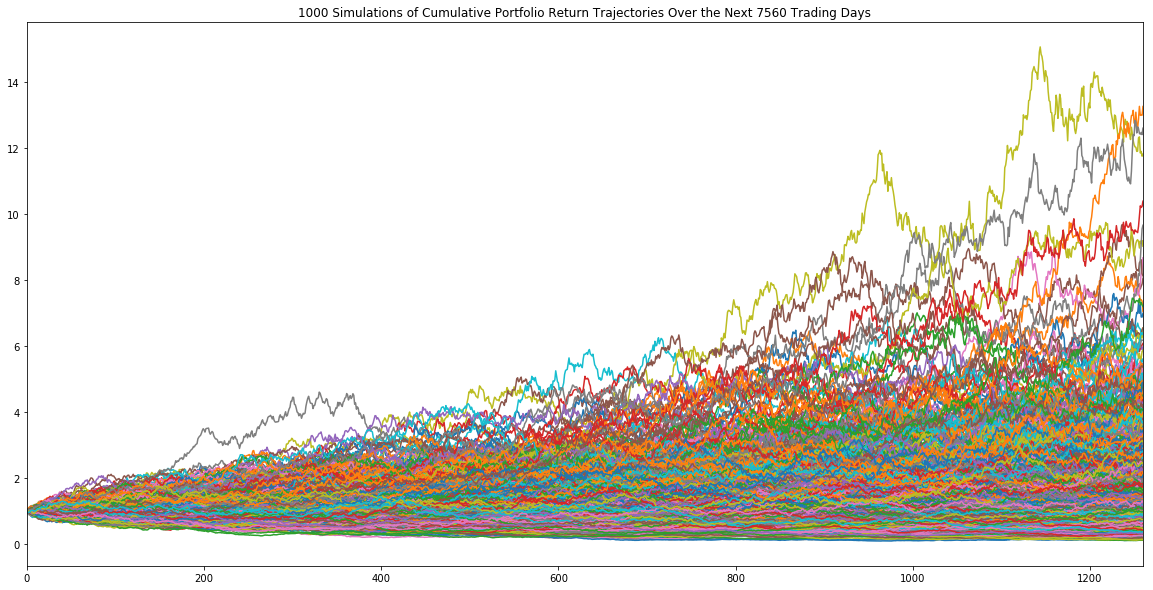

In [44]:
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize =(20,10))

In [45]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    1.178336
1    2.189375
2    1.584481
3    4.187525
4    0.390445
Name: 1260, dtype: float64

In [46]:
ending_cumulative_returns.min(), ending_cumulative_returns.max(), ending_cumulative_returns.median()

(0.11707630299526525, 13.269617519072725, 1.2479341431761763)

In [47]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.380338
0.95    4.496981
Name: 1260, dtype: float64

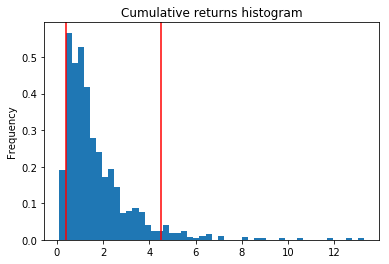

In [48]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind="hist", title = "Cumulative returns histogram", density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color="r")
plt.axvline(confidence_interval.iloc[1], color="r")
#plt.savefig(‘./Images/ending_returns_hist.png’)

In [49]:
# Compute cumulative returns
cumulative_returns_percentiles = ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.90])
print(f"Expected cumulative returns at 30 years for 10th, 50th and 90th percentiles: \n{cumulative_returns_percentiles}")

Expected cumulative returns at 30 years for 10th, 50th and 90th percentiles: 
0.1    0.477526
0.5    1.247934
0.9    3.439069
Name: 1260, dtype: float64


In [50]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
cumulative_pnl = initial_investment * cumulative_returns_percentiles
cumulative_pnl.astype(int)

0.1     9550
0.5    24958
0.9    68781
Name: 1260, dtype: int64